In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.odr import * 

In [2]:
data = pd.read_csv('ag2.txt', header = 0, names = ['b-v', 'v']) 
data.head()

,b-v,v
0,1.110742,12.999174
1,0.426737,8.766554
2,1.962863,16.706395
3,1.812563,16.906182
4,1.062060,11.962806


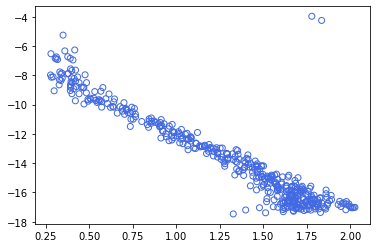

In [3]:
plt.scatter(data['b-v'], -data['v'], color = 'none', edgecolor = 'royalblue')

In [4]:
x = data['b-v']
y = -data['v']

In [5]:
def linear_func(p, x):
    m, c = p
    return m*x + c

# Model object
modelo = Model(linear_func)

# test data and error

# Create a RealData object
data1 = RealData(x, y)

initialguess = [1,1]
odr = ODR(data1, modelo, beta0=initialguess)


# Run the regression.
odr.set_job(fit_type=2) #0 = implicit ODR, 1 = explicit ODR, 2 = ordinary least squares
out = odr.run()

#print fit parameters and 1-sigma estimates
popt = out.beta
perr = out.sd_beta

nstd = 1. # to draw 5-sigma intervals
popt_up = popt + nstd * perr
popt_dw = popt - nstd * perr



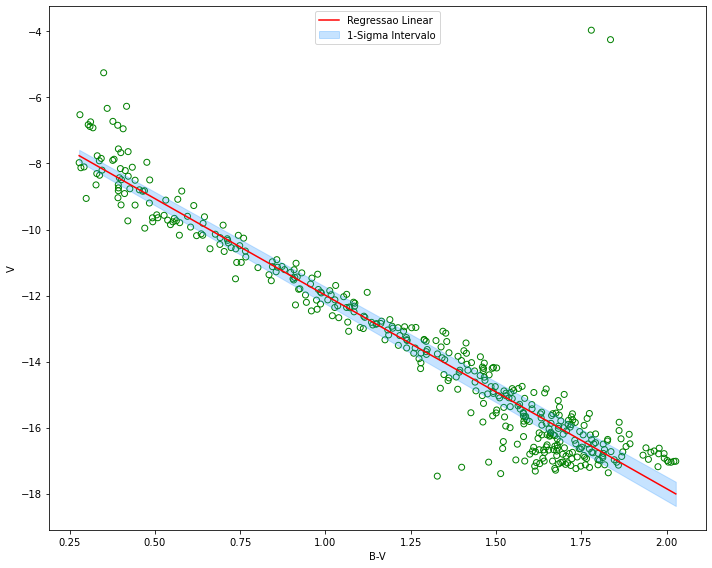

In [6]:
t_fit = np.linspace(x.min(), x.max(), len(x))
fit = linear_func(popt, t_fit)
fit_up = linear_func(popt_up, t_fit)
fit_dw= linear_func(popt_dw, t_fit) 

fig, ax = plt.subplots(figsize=(10,8))


ax.plot(t_fit, fit, 'r', color = 'red', label='Regressao Linear')
ax.scatter(x,y, color = 'none', edgecolor = 'green')
ax.fill_between(t_fit, fit_up, fit_dw, alpha=.25, label='1-Sigma Intervalo', color = 'dodgerblue')
ax.legend(framealpha=0.8, loc = 'upper center')
ax.set_xlabel('B-V')
ax.set_ylabel('V')
fig.tight_layout()

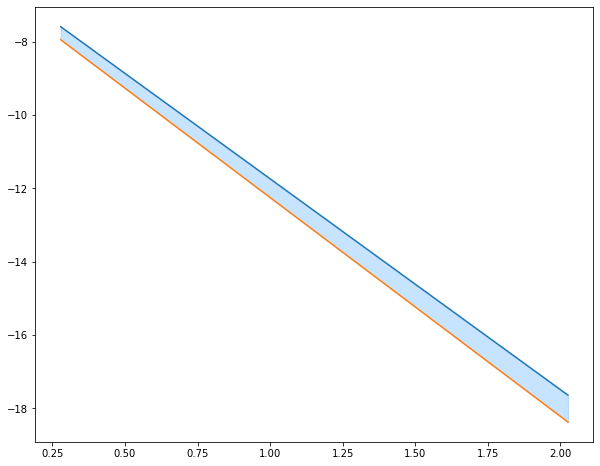

In [7]:
plt.figure(figsize=(10,8))
plt.plot(t_fit,t_fit*popt_up[0] + popt_up[1]) #Regressao linear para o sigma superior
#plt.plot(t_fit, fit, 'r', color = 'red', label='Regressao Linear') Linha da regressao normal
plt.plot(t_fit,t_fit*popt_dw[0] + popt_dw[1]) #Regressao linear para o sigma superior

plt.fill_between(t_fit, fit_up, fit_dw, alpha=.25, label='1-Sigma Intervalo', color = 'dodgerblue')

In [8]:
mup, bup = popt_up[0],popt_up[1]
mdw, bdw = popt_dw[0], popt_dw[1]

xadj = []
yadj = []

for a,b in zip(x,y):
    if (a*mup + bup) >= b and (a*mdw + bdw) <= b:
        xadj.append(a)
        yadj.append(b)
    

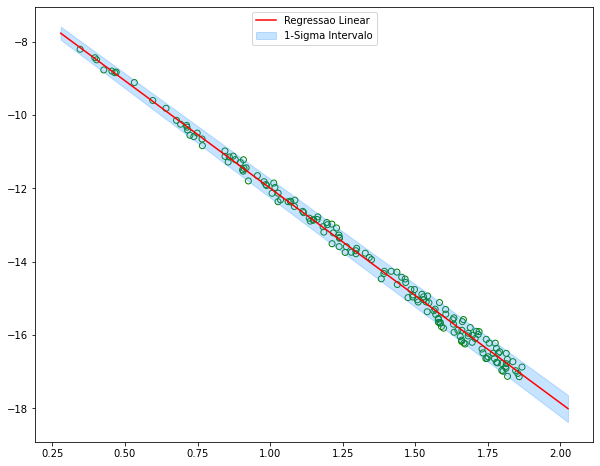

In [9]:
plt.figure(figsize=(10,8))
plt.plot(t_fit, fit, 'r', color = 'red', label='Regressao Linear')
plt.scatter(xadj,yadj, color = 'none', edgecolor = 'green')
plt.fill_between(t_fit, fit_up, fit_dw, alpha=.25, label='1-Sigma Intervalo', color = 'dodgerblue')
plt.legend(framealpha=0.8, loc = 'upper center')

In [10]:
estrelas_antes = len(x)
estrelas_depois = len(xadj)

print('Haviam',estrelas_antes, 'estrelas antes do sigma-clipping.' )
print(estrelas_antes - estrelas_depois, 'estrelas foram retiradas.')
print('Apenas', estrelas_depois, 'remanesceram no intervalo 1-sigma.')

Haviam 428 estrelas antes do sigma-clipping.
264 estrelas foram retiradas.
Apenas 164 remanesceram no intervalo 1-sigma.


In [11]:
xout = []
yout = []
for a,b in zip(x,y):
    if a not in xadj and b not in yadj:
        xout.append(a)
        yout.append(b)

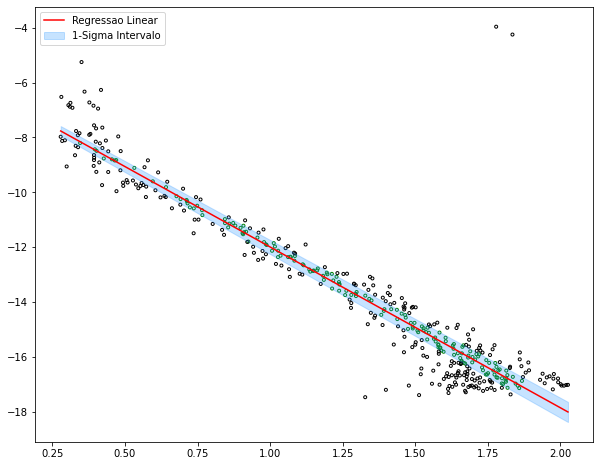

In [12]:
plt.figure(figsize=(10,8))
plt.plot(t_fit, fit, 'r', color = 'red', label='Regressao Linear')
plt.scatter(xadj,yadj, marker='.', color = 'none', edgecolor = 'green')
plt.scatter(xout,yout, marker = ".",color = 'none', edgecolor = 'black')
plt.fill_between(t_fit, fit_up, fit_dw, alpha=.25, label='1-Sigma Intervalo', color = 'dodgerblue')
plt.legend(framealpha=0.8, loc = 'best');
#plt.savefig('test.png', format = 'png')